In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
len(x_train)

60000

In [32]:
len(x_test)

10000

In [33]:
X = x_train[87]

In [34]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [35]:
X.shape

(28, 28)

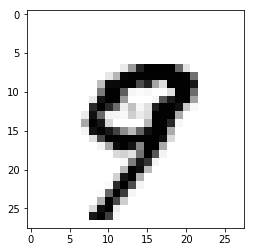

In [36]:
plt.imshow(X, cmap='Greys')

In [37]:
y_train[87]

9

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
x_test.shape

(10000, 28, 28)

In [40]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [41]:
from keras.utils import np_utils

In [42]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [43]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [101]:
model = Sequential()

In [102]:
model.add(Dense(4, input_dim=784))
model.add(Activation('sigmoid'))

In [103]:
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [104]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [105]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_22 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_23 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [107]:
784*4+4

3140

In [108]:
4*2+2

10

In [109]:
2*10+10

30

In [110]:
model_10 = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0901 - acc: 0.0993 - val_loss: 0.0898 - val_acc: 0.1043
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0896 - acc: 0.1156 - val_loss: 0.0895 - val_acc: 0.1172
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0893 - acc: 0.1349 - val_loss: 0.0893 - val_acc: 0.1439
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0891 - acc: 0.1534 - val_loss: 0.0891 - val_acc: 0.1520
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0890 - acc: 0.1602 - val_loss: 0.0889 - val_acc: 0.1571
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0888 - acc: 0.1656 - val_loss: 0.0887 - val_acc: 0.1612
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0886 - acc: 0.1942 - val_loss: 0.0885 - val_acc

In [55]:
from ipywidgets import interact_manual

In [56]:
predict = model.predict_classes(x_test)

In [57]:
predict

array([9, 2, 1, ..., 9, 9, 2], dtype=int64)

In [60]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict[測試編號])

神經網路判斷為: 1


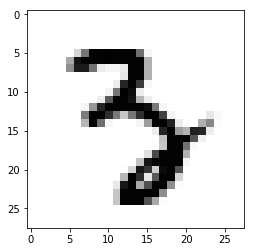

In [61]:
test(87)

In [62]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [63]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [64]:
print('loss:', score[0])
print('正確率:', score[1])

loss: 0.08505116770267486
正確率: 0.2898


In [66]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')

In [67]:
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [68]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max()- x_test.min())

In [111]:
model1 = Sequential()
model1.add(Dense(4, input_dim=784))
model1.add(Activation('sigmoid'))
model1.add(Dense(2))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_25 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_26 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [112]:
model1_20 = model1.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0906 - acc: 0.0974 - val_loss: 0.0905 - val_acc: 0.0982
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0904 - acc: 0.0992 - val_loss: 0.0903 - val_acc: 0.1056
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0902 - acc: 0.1104 - val_loss: 0.0902 - val_acc: 0.1283
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0901 - acc: 0.1367 - val_loss: 0.0901 - val_acc: 0.1402
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0901 - acc: 0.1445 - val_loss: 0.0900 - val_acc: 0.1479
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1655 - val_loss: 0.0900 - val_acc: 0.1858
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0899 - acc: 0.1760 - val_loss: 0.0899 - val_acc

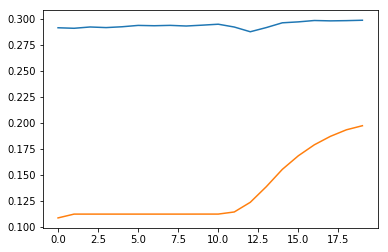

In [73]:
plt.plot(model_10.history["acc"])
plt.plot(model1_20.history["acc"])
plt.show()

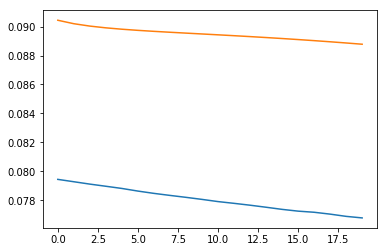

In [78]:
plt.plot(model_10.history["val_loss"])
plt.plot(model1_20.history["val_loss"])
plt.show()